In [2]:
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pyNBS import pyNBS_plotting as plot

In [39]:
folder_path = '/cellar/users/jkhuang/Data/nosnap/Projects/pyNBS/supp_run_pyNBS_2018-02-02/'
folder = os.listdir(folder_path)
default_path = '/cellar/users/jkhuang/Data/nosnap/Projects/pyNBS/supp_run_pyNBS_2018-01-29/'
clin_data_fn = '/cellar/users/t1jia/pyNBS/Examples/Example_Data/Clinical_Files/BLCA.clin.merged.surv.txt'

#### For p-val heatmap

In [40]:
p_df = pd.DataFrame(np.zeros((9,6)),index=np.arange(0.1, 1.0, 0.1), 
             columns=range(2,8))

In [46]:
for a in np.arange(0.1, 1.0, 0.1):
    for k in range(2,8):
        fn = 'BLCA_k'+repr(k)+'_a'+str(a)+'_cluster_assignments.csv'
        assignment = pd.read_csv(folder_path+fn, header=None, index_col=0,squeeze=True)
        p = plot.cluster_KMplot(assignment, clin_data_fn, delimiter=',', lr_test=True, verbose=False)
        p_df.loc[a][k] = -np.log10(p)

In [6]:
p_df

,2,3,4,5,6,7
0.1,0.368091,0.536893,0.738508,1.414825,1.588023,1.671162
0.2,0.407165,0.595253,0.427344,1.964969,2.416907,1.493451
0.3,0.595014,0.595253,1.073071,0.216871,1.122834,1.114575
0.4,0.407165,0.536893,1.524971,0.442756,0.745765,0.540225
0.5,0.749619,0.595253,1.054980,0.828130,1.341888,0.712759
0.6,0.749619,0.595253,0.827625,0.840819,2.061570,1.492761
0.7,0.595014,0.597541,1.187015,1.752769,1.405147,1.310798
0.8,0.745706,0.679679,1.235258,0.525887,2.146703,0.970601
0.9,0.407165,0.427497,1.132015,0.080651,0.097685,0.053100


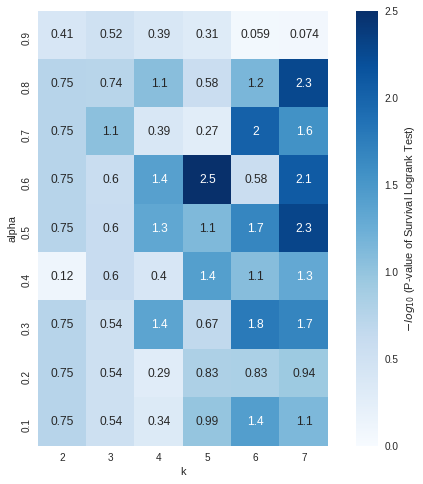

In [48]:
# compare with all alpha with k=4
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(p_df,vmin=0, vmax=2.5,annot=True,square=True,ax=ax,cmap='Blues',
            cbar_kws={'label': r'$-log_{10}$ (P-value of Survival Logrank Test)'})
ax.invert_yaxis()
ax.set_xlabel('k')
ax.set_ylabel('alpha')
plt.show()

#### Stochasticity of pyNBS

In [9]:
default_cluster_assigns = []
for fn in os.listdir(default_path):
    if 'default' in fn and 'cluster_assignments' in fn:
        df = pd.read_csv(default_path+fn,header=None, index_col=0)
        df.columns = [int(fn.split('_')[2])]
        default_cluster_assigns.append(df)
concat = pd.concat(default_cluster_assigns, axis=1)
concat = concat[sorted(concat.columns)]

In [10]:
concat

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
TCGA-2F-A9KO,3,4,3,3,3,4,4,4,3,3
TCGA-2F-A9KP,3,4,3,3,3,4,4,4,3,3
TCGA-2F-A9KQ,3,4,3,3,3,4,4,4,3,3
TCGA-2F-A9KR,3,4,3,3,3,4,4,4,3,3
TCGA-2F-A9KT,3,4,3,3,3,4,4,4,3,3
TCGA-2F-A9KW,3,4,3,3,3,4,4,4,3,3
TCGA-4Z-AA7M,3,4,3,3,3,4,4,4,3,3
TCGA-4Z-AA7N,3,4,3,3,3,4,4,4,3,3
TCGA-4Z-AA7O,3,4,3,3,3,4,4,4,2,3


In [11]:
ari_df = pd.DataFrame(np.zeros((10,10)),index=range(1,11), 
             columns=range(1,11))
for i in range(1, 11):
    for j in range(1, 11):
        ari_df.loc[i][j] = adjusted_rand_score(concat.loc[:, i], concat.loc[:, j])

In [12]:
ari_df

,1,2,3,4,5,6,7,8,9,10
1,1.000000,0.742510,0.724337,0.790613,0.818125,0.760871,0.807621,0.789864,0.655000,0.885181
2,0.742510,1.000000,0.720933,0.725458,0.774427,0.754602,0.830316,0.780095,0.709431,0.763450
3,0.724337,0.720933,1.000000,0.867777,0.754363,0.848144,0.719619,0.756186,0.776687,0.715157
4,0.790613,0.725458,0.867777,1.000000,0.820518,0.827797,0.782430,0.764857,0.780266,0.781085
5,0.818125,0.774427,0.754363,0.820518,1.000000,0.861559,0.878341,0.821544,0.776123,0.884470
6,0.760871,0.754602,0.848144,0.827797,0.861559,1.000000,0.785402,0.831642,0.755046,0.820608
7,0.807621,0.830316,0.719619,0.782430,0.878341,0.785402,1.000000,0.811178,0.738066,0.799098
8,0.789864,0.780095,0.756186,0.764857,0.821544,0.831642,0.811178,1.000000,0.778822,0.850489
9,0.655000,0.709431,0.776687,0.780266,0.776123,0.755046,0.738066,0.778822,1.000000,0.734067
10,0.885181,0.763450,0.715157,0.781085,0.884470,0.820608,0.799098,0.850489,0.734067,1.000000


In [13]:
ari_vect = np.array(ari_df)[np.triu_indices(10, 1)]

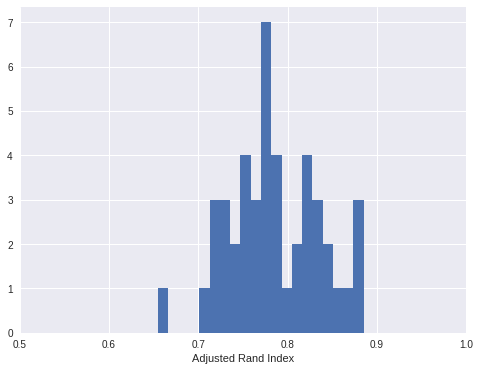

In [32]:
fig, ax = plt.subplots(figsize=(8,6))  
plt.hist(ari_vect, bins=20)
ax.set_xlabel('Adjusted Rand Index')
ax.set_xlim(0.5,1)
plt.show()

In [35]:
default_p_vect = []
for fn in os.listdir(default_path):
    if 'default' in fn and 'cluster_assignments' in fn:
        df = pd.read_csv(default_path+fn,header=None, index_col=0, squeeze=True)
        p = plot.cluster_KMplot(df, clin_data_fn, delimiter=',', lr_test=True, verbose=False)
        default_p_vect.append(p)

In [36]:
default_p_vect

[0.19611201303535139,
 0.18166435667368219,
 0.28610718356520876,
 0.041995875254969749,
 0.25022423893728263,
 0.047935807808122462,
 0.19509936771128272,
 0.025546257903224054,
 0.56154438376393401,
 0.53580239241303818]

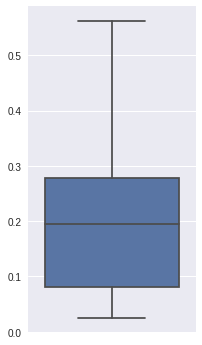

In [38]:
fig, ax = plt.subplots(figsize=(3,6))  
ax = sns.boxplot(y=default_p_vect)
plt.show()

/cellar/users/jkhuang/Data/nosnap/Projects/pyNBS/supp_run_pyNBS_2018-01-29/